Comparing KZT Exchange Rate Stability Against USD, EUR, CNY, and RUB from 2000 to 2024


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Sat, 07 Dec 2024 16_45_44.xlsx'

data = pd.read_excel(file_path, sheet_name=None)

print("Available sheets:", data.keys())

df = data['Exchange Rates']

df.head()

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9086 entries, 0 to 9085
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9086 non-null   object 
 1   USD     9086 non-null   float64
 2   EUR     9086 non-null   float64
 3   CNY     9086 non-null   float64
 4   RUB     9086 non-null   float64
dtypes: float64(4), object(1)
memory usage: 355.0+ KB


In [ ]:
df.describe()

,USD,EUR,CNY,RUB
count,9086.000000,9086.000000,9086.000000,9086.000000
mean,239.284383,277.412285,34.494624,5.083913
std,127.528784,135.468272,19.391311,0.693549
min,117.250000,121.250000,14.680000,2.620000
25%,145.100000,167.222500,17.590000,4.750000
50%,152.050000,203.910000,23.510000,4.940000
75%,367.060000,416.170000,53.540000,5.400000
max,524.650000,563.560000,80.760000,9.100000


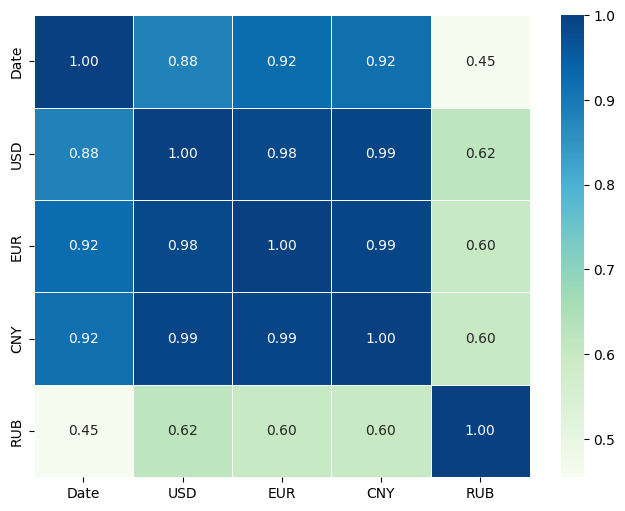

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# If you want to visualize correlations, you can create a heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()


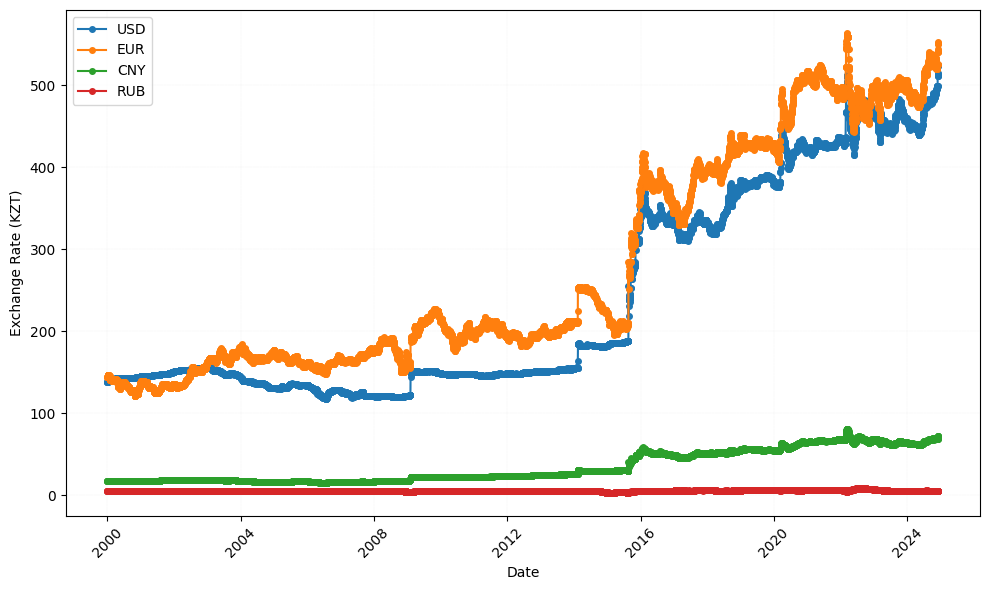

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Sat, 07 Dec 2024 16_45_44.xlsx'
df = pd.read_excel(file_path, sheet_name='Exchange Rates')

# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Plotting the exchange rates
plt.figure(figsize=(10, 6))

# Plotting each currency's exchange rate
plt.plot(df['Date'], df['USD'], label='USD', marker='o', markersize=4)
plt.plot(df['Date'], df['EUR'], label='EUR', marker='o', markersize=4)
plt.plot(df['Date'], df['CNY'], label='CNY', marker='o', markersize=4)
plt.plot(df['Date'], df['RUB'], label='RUB', marker='o', markersize=4)

# Add gridlines to the plot for easy reference
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.05)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Exchange Rate (KZT)')
plt.title('Exchange Rates Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

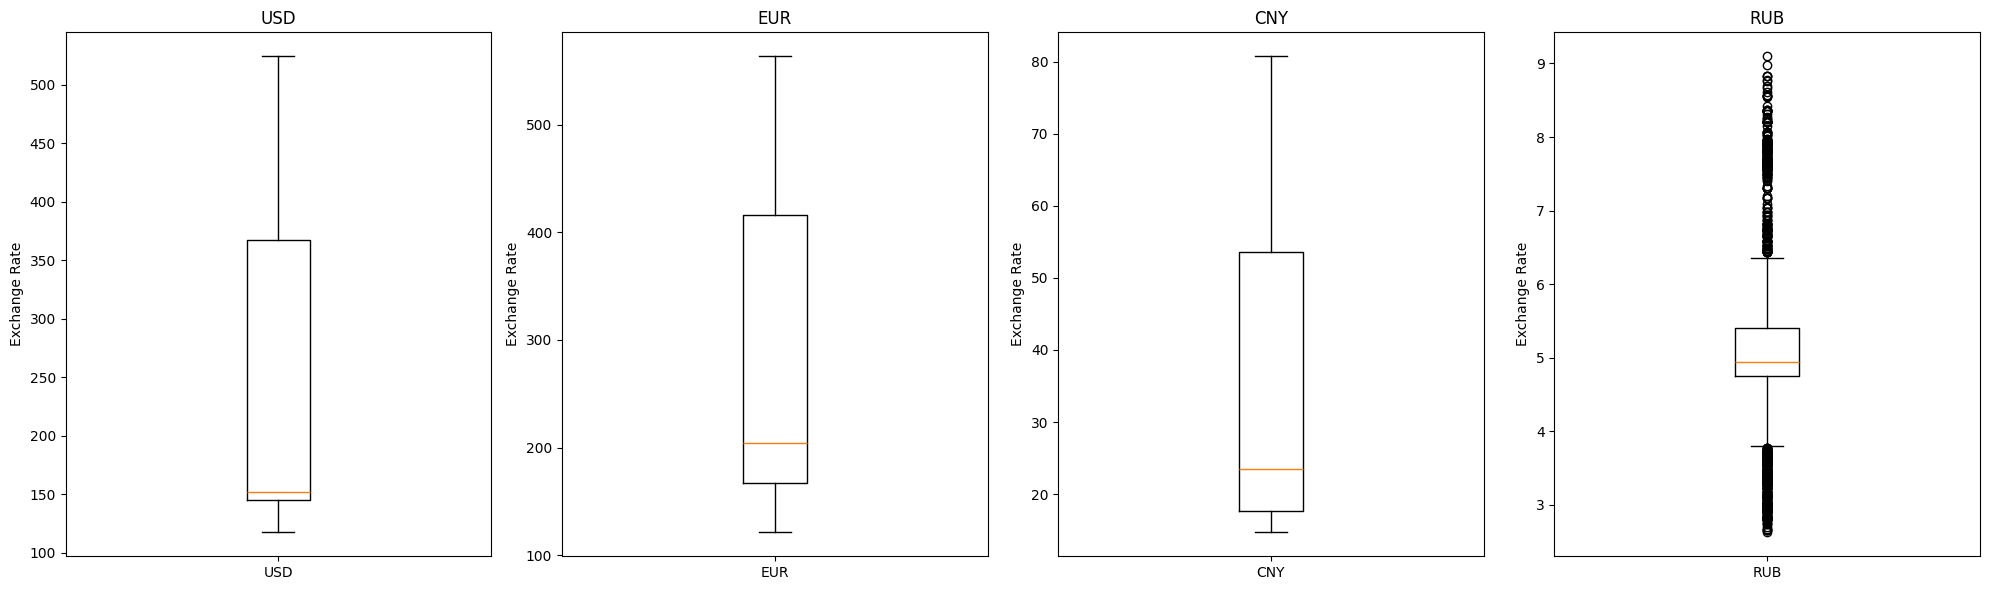

In [ ]:
# Create a figure with 4 subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# List of currencies and titles
currencies = ['USD', 'EUR', 'CNY', 'RUB']
titles = ['USD', 'EUR', 'CNY', 'RUB']

# Loop through each subplot and currency
for i, currency in enumerate(currencies):
    axes[i].boxplot(df[currency])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Exchange Rate')
    axes[i].set_xticklabels([currency])

# Display the plot
plt.tight_layout()
plt.show()


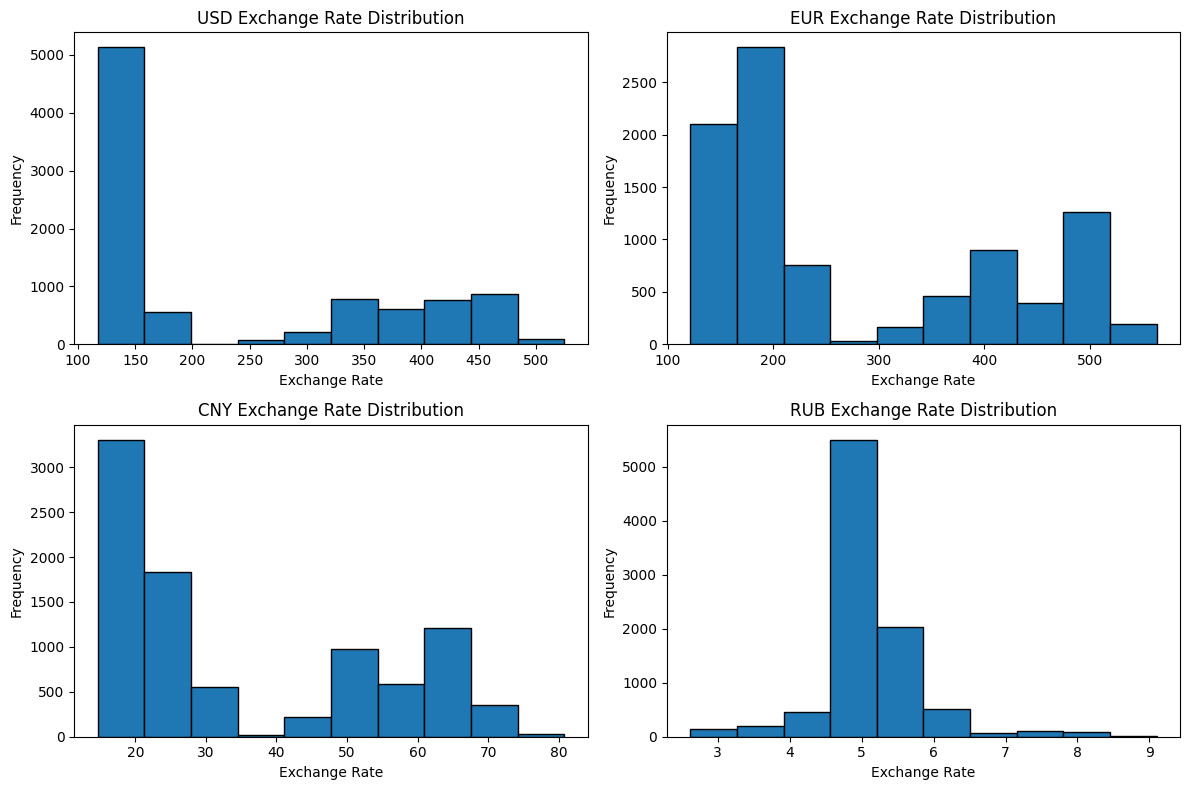

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each currency
plt.figure(figsize=(12, 8))

# Loop through the available currencies and plot their histograms
for i, currency in enumerate(['USD', 'EUR', 'CNY', 'RUB']):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each currency
    plt.hist(df[currency], bins=10, edgecolor='black')  # Histogram with 10 bins
    plt.title(f'{currency} Exchange Rate Distribution')  # Title for each subplot
    plt.xlabel('Exchange Rate')  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

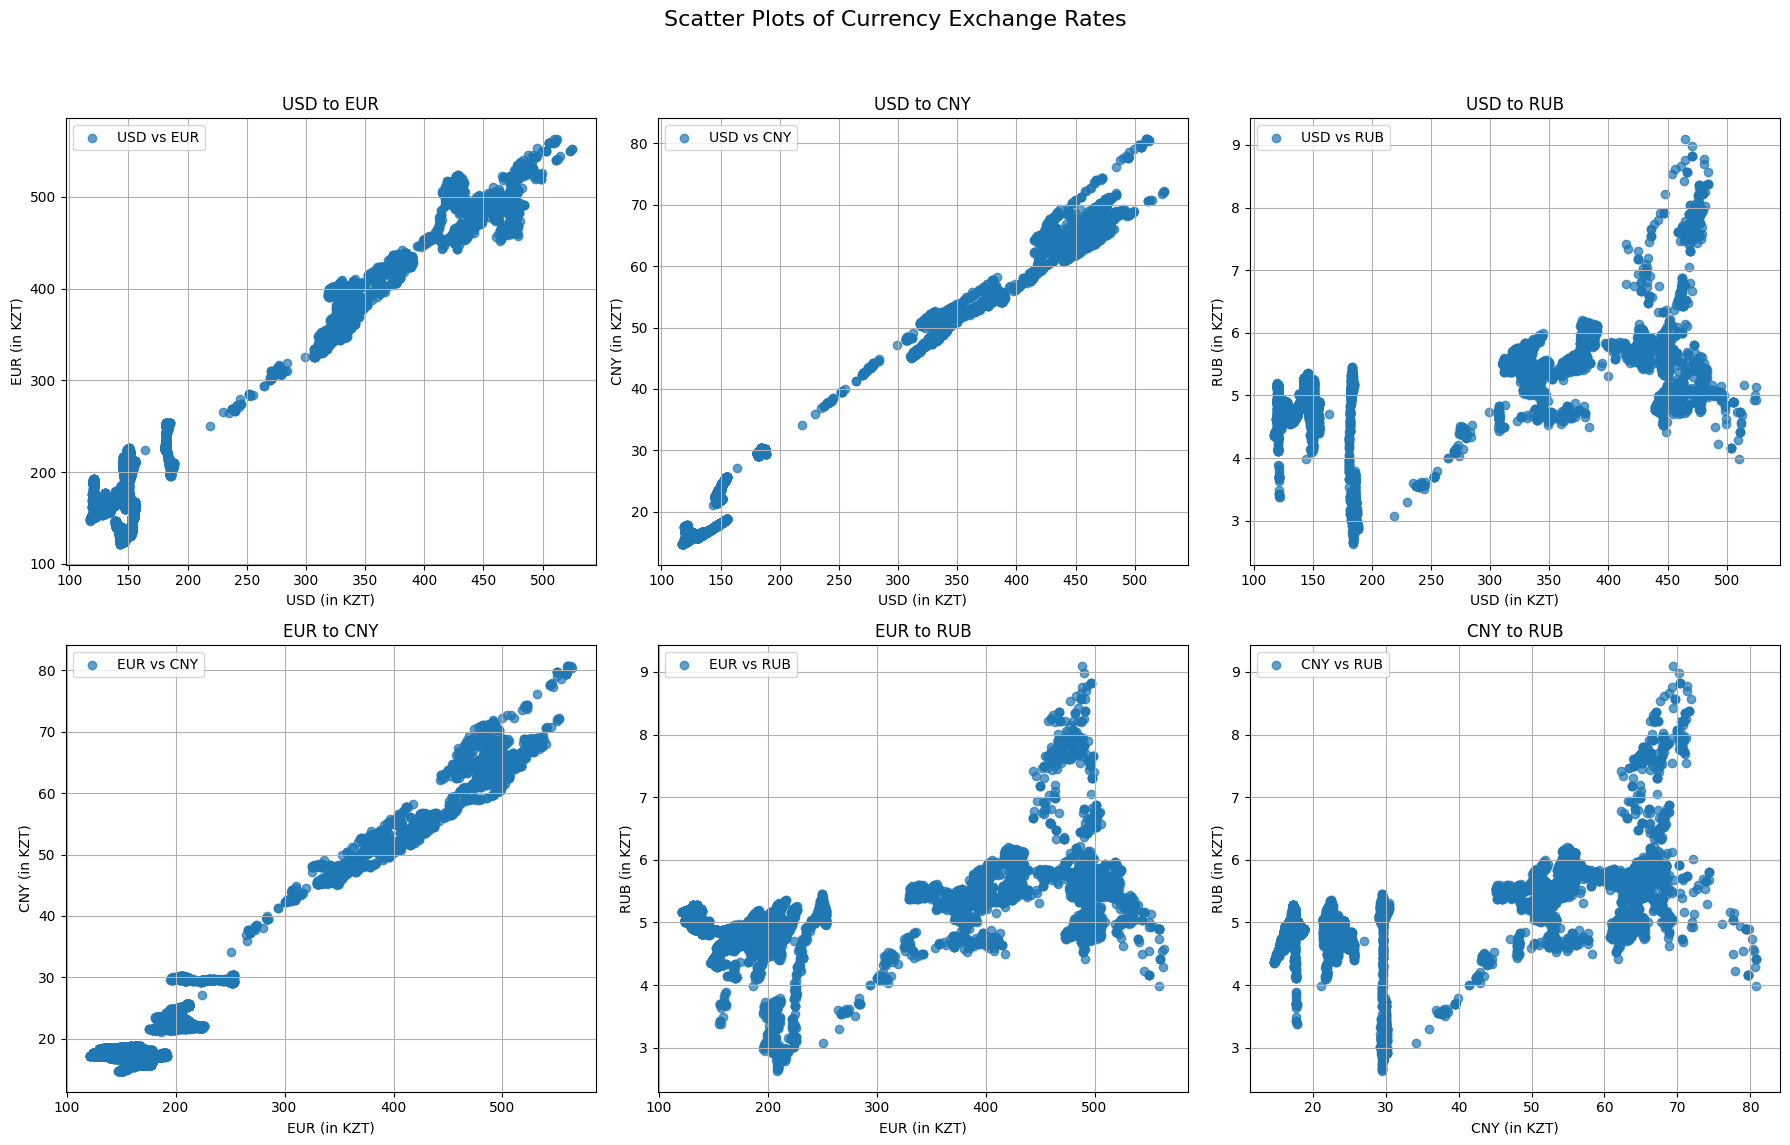

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations# List of currencies in the dataset
currencies = ['USD', 'EUR', 'CNY', 'RUB']

# Generate all possible unique currency pairs
currency_pairs = list(combinations(currencies, 2))

# Calculate the number of rows and columns for subplots based on pairs
n_pairs = len(currency_pairs)
n_cols = 3
n_rows = (n_pairs + n_cols - 1) // n_cols  # Ceiling division

# Create the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
fig.suptitle('Scatter Plots of Currency Exchange Rates', fontsize=16)

# Flatten the axes for easy indexing
axs = axs.flatten()

# Plot each pair in a subplot
for idx, (curr1, curr2) in enumerate(currency_pairs):
    axs[idx].scatter(df[curr1], df[curr2], label=f'{curr1} vs {curr2}', alpha=0.7)
    axs[idx].set_title(f'{curr1} to {curr2}')
    axs[idx].set_xlabel(f'{curr1} (in KZT)')
    axs[idx].set_ylabel(f'{curr2} (in KZT)')
    axs[idx].legend()
    axs[idx].grid(True)

# Hide any unused subplots
for idx in range(len(currency_pairs), len(axs)):
    axs[idx].axis('off')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()

# Thigboard

In [ ]:
# draft
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import requests
from google.colab import drive
from google.colab import auth

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Sat, 07 Dec 2024 16_45_44.xlsx'

data = pd.read_excel(file_path, sheet_name=None)

df = data['Exchange Rates']


access_token = 'VAuW6K51SekoElAN2XZm'
url = 'https://demo.thingsboard.io/api/v1/VAuW6K51SekoElAN2XZm/telemetry' #change here too


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
import pandas as pd
from google.colab import drive
import time

# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/exchange.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Select first 1000 rows
data = data.head(1000)

# ThingsBoard device access token and URL
access_token = 'ivYWquBUccm45iXFxSLC'
url = f'https://demo.thingsboard.io/api/v1/{access_token}/telemetry'

# Loop through rows to send data
for index, row in data.iterrows():
    # Convert Date to Unix timestamp in milliseconds
    timestamp_ms = int(row['Date'].timestamp() * 1000)

    # Prepare payload with a timestamp
    payload = {
        "ts": timestamp_ms,  # Timestamp in milliseconds
        "values": {
            "USD": row['USD'],
            "EUR": row['EUR'],
            "CNY": row['CNY'],
            "RUB": row['RUB']
        }
    }

    # Send POST request
    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            print(f"Row {index + 1} sent successfully.")
        else:
            print(f"Error sending row {index + 1}: {response.status_code}, {response.text}")
    except Exception as e:
        print(f"Exception while sending row {index + 1}: {e}")

    # Add delay to avoid server overload
    time.sleep(0.1)  # 100ms delay



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Row 1 sent successfully.
Row 2 sent successfully.
Row 3 sent successfully.
Row 4 sent successfully.
Row 5 sent successfully.
Row 6 sent successfully.
Row 7 sent successfully.
Row 8 sent successfully.
Row 9 sent successfully.
Row 10 sent successfully.
Row 11 sent successfully.
Row 12 sent successfully.
Row 13 sent successfully.
Row 14 sent successfully.
Row 15 sent successfully.
Row 16 sent successfully.
Row 17 sent successfully.
Row 18 sent successfully.
Row 19 sent successfully.
Row 20 sent successfully.
Row 21 sent successfully.
Row 22 sent successfully.
Row 23 sent successfully.
Row 24 sent successfully.
Row 25 sent successfully.
Row 26 sent successfully.
Row 27 sent successfully.
Row 28 sent successfully.
Row 29 sent successfully.
Row 30 sent successfully.
Row 31 sent successfully.
Row 32 sent successfully.
Row 33 sent successfully.
Row 34 sent successful

In [ ]:
import requests
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Sat, 07 Dec 2024 16_45_44.xlsx'
data = pd.read_excel(file_path, sheet_name='Exchange Rates')

access_token = 'VAuW6K51SekoElAN2XZm'
url = f'https://demo.thingsboard.io/api/v1/{access_token}/telemetry'

data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

subset_data = data.head(1000)

for index, row in subset_data.iterrows():
    payload = {
        "Date": row['Date'].strftime('%Y-%m-%d'),  # Format date
        "USD": row['USD'],
        "EUR": row['EUR'],
        "CNY": row['CNY'],
        "RUB": row['RUB']
    }

    # Send data to ThingsBoard
    response = requests.post(url, json=payload)

    if response.status_code == 200:
        print(f"Successfully sent data for {row['Date']}")
    else:
        print(f"Failed to send data for {row['Date']}: {response.text}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Sat, 07 Dec 2024 16_45_44.xlsx'

## MAchine LEarn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


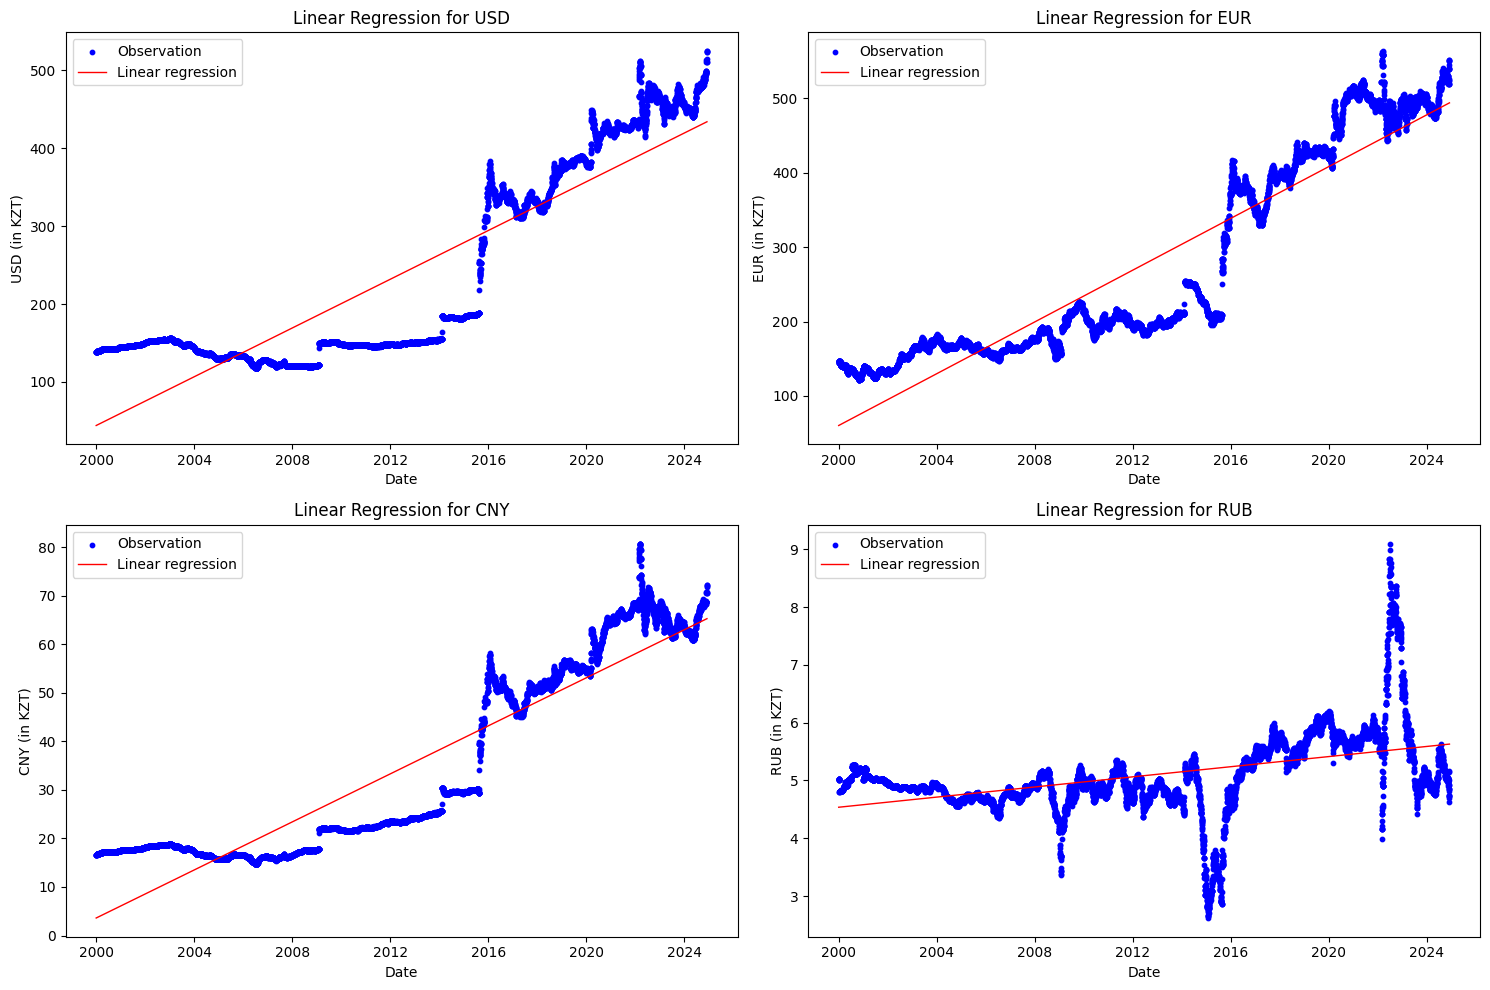

Regression Results:
USD:
  Slope: 0.04280502011636747
  Intercept: -31208.721326794563
  R-squared: 0.778338959130679

EUR:
  Slope: 0.04762364786799108
  Intercept: -34710.74438421354
  R-squared: 0.8538192233722295

CNY:
  Slope: 0.006772034370517544
  Intercept: -4940.7857283120975
  R-squared: 0.8425966715861106

RUB:
  Slope: 0.00011997236278358435
  Intercept: -83.05742079917964
  R-squared: 0.20673006534934213



In [ ]:
import requests
import pandas as pd
from google.colab import drive
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/exchange.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Convert Date to ordinal to use as a numerical feature for regression
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Define currencies
currencies = ['USD', 'EUR', 'CNY', 'RUB']

# Prepare the model
model = LinearRegression()

# Create a dictionary to store results
regression_results = {}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Perform linear regression for each currency
for i, currency in enumerate(currencies):
    # Select the feature and target
    X = data[['Date_ordinal']]  # Dates as the feature
    y = data[currency]  # Currency as the target

    # Fit the model
    model.fit(X, y)

    # Store the results (slope, intercept)
    regression_results[currency] = {
        'slope': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': model.score(X, y)
    }

    # Predict the values
    data[f'{currency}_predicted'] = model.predict(X)

    # Select the appropriate subplot (2x2 grid)
    ax = axes[i // 2, i % 2]
    ax.scatter(data['Date'], y, color='blue', label='Observation', s=10)
    ax.plot(data['Date'], data[f'{currency}_predicted'], color='red', label='Linear regression', linewidth=1)
    ax.set_title(f'Linear Regression for {currency}')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{currency} (in KZT)')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Display regression results
print("Regression Results:")
for currency, result in regression_results.items():
    print(f"{currency}:")
    print(f"  Slope: {result['slope']}")
    print(f"  Intercept: {result['intercept']}")
    print(f"  R-squared: {result['r_squared']}\n")



Mounted at /content/drive


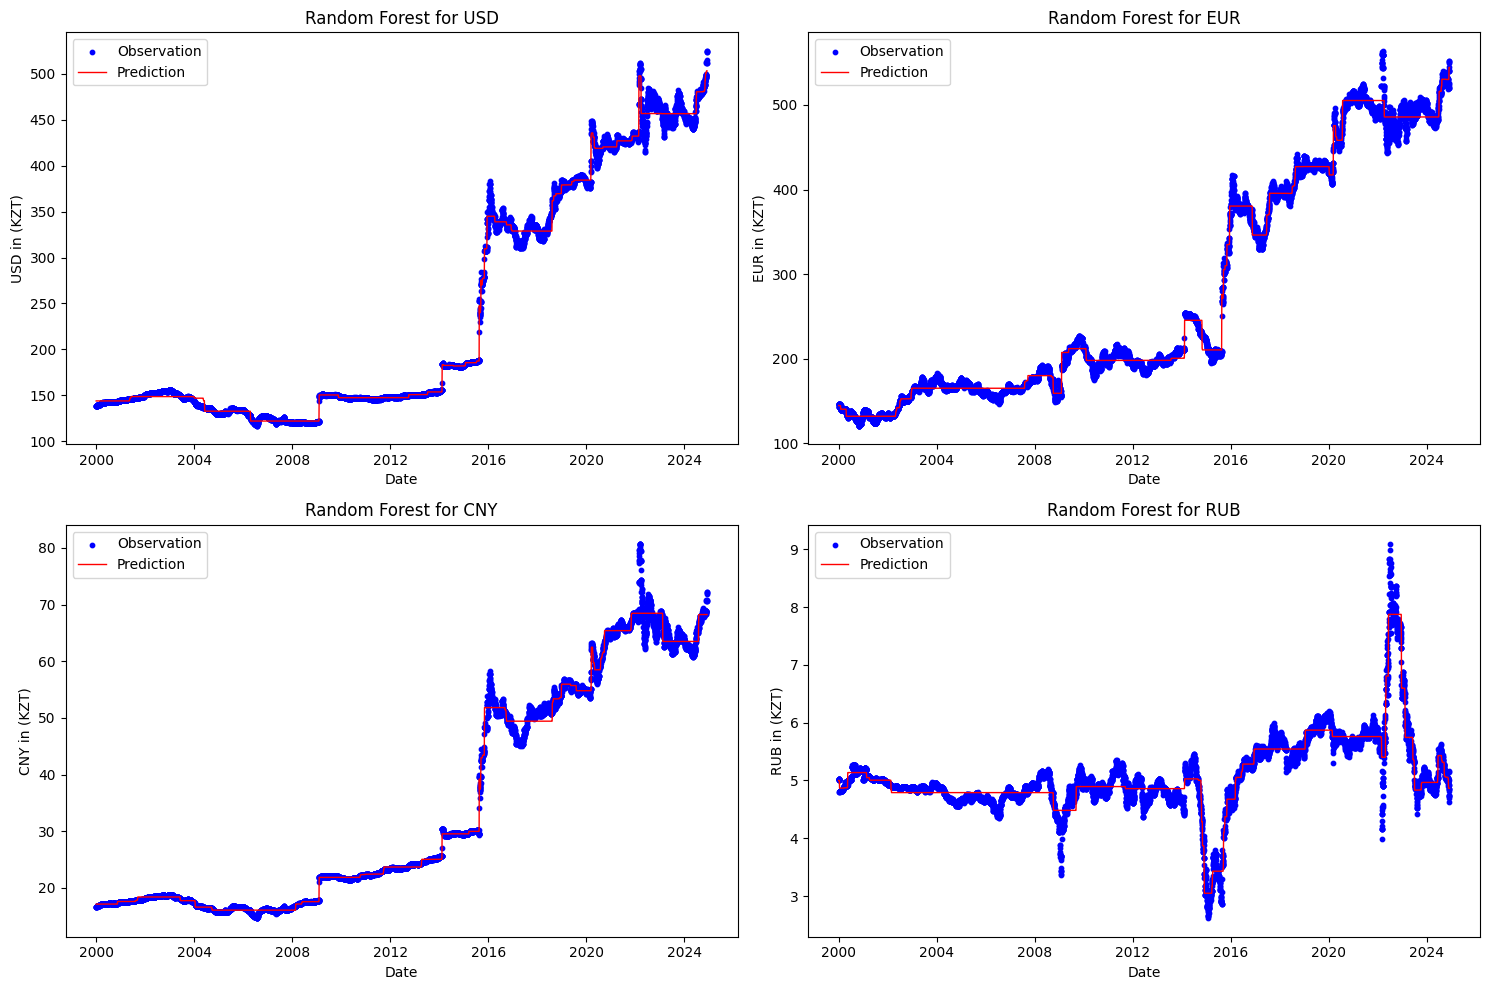

Random Forest Results with Regularization:
USD:
  R-squared: 0.9979377253103251

EUR:
  R-squared: 0.9961953280884326

CNY:
  R-squared: 0.9961729407973542

RUB:
  R-squared: 0.9374644531808266



In [ ]:
import requests
import pandas as pd
from google.colab import drive
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/exchange.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Convert Date to ordinal to use as a numerical feature for regression
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Define currencies
currencies = ['USD', 'EUR', 'CNY', 'RUB']

# Prepare the Random Forest model with regularization parameters
model = RandomForestRegressor(
    n_estimators=100,         # Number of trees
    max_depth=5,             # Limit the depth of trees (regularization)
    min_samples_split=3,      # Minimum samples to split an internal node
    min_samples_leaf=2,       # Minimum samples to be at a leaf node
    max_features='sqrt',      # Number of features to consider at each split (sqrt is often a good default)
    random_state=42
)

# Create a dictionary to store results
regression_results = {}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Perform Random Forest regression for each currency
for i, currency in enumerate(currencies):
    # Select the feature and target
    X = data[['Date_ordinal']]  # Dates as the feature
    y = data[currency]  # Currency as the target

    # Fit the model
    model.fit(X, y)

    # Store the results (R-squared)
    regression_results[currency] = {
        'r_squared': model.score(X, y)
    }

    # Predict the values
    data[f'{currency}_predicted'] = model.predict(X)

    # Select the appropriate subplot (2x2 grid)
    ax = axes[i // 2, i % 2]
    ax.scatter(data['Date'], y, color='blue', label='Observation', s=10)  # Adjusted dot size
    ax.plot(data['Date'], data[f'{currency}_predicted'], color='red', label='Prediction', linewidth=1)
    ax.set_title(f'Random Forest for {currency}')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{currency} in (KZT)')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Display regression results
print("Random Forest Results with Regularization:")
for currency, result in regression_results.items():
    print(f"{currency}:")
    print(f"  R-squared: {result['r_squared']}\n")



Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  -1.6678477830752079
R-squared on test data: 0.9998947540481175


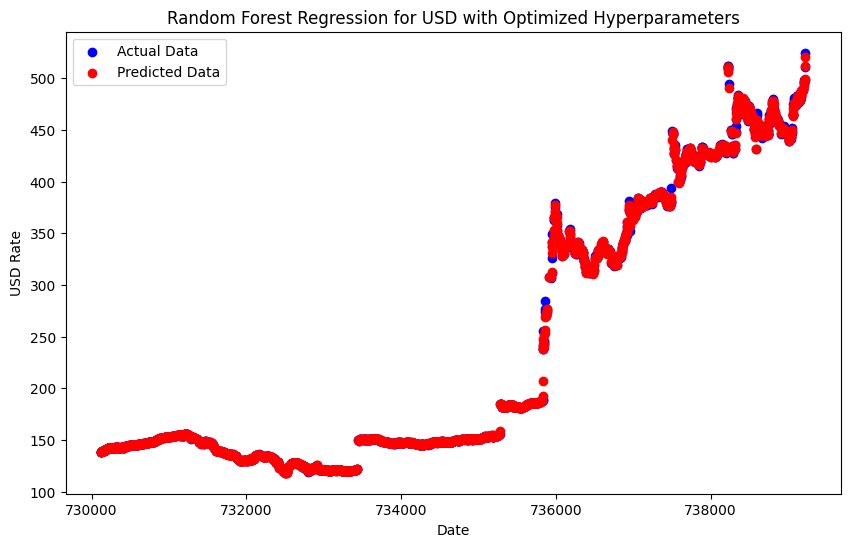

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/exchange.csv'  # Modify with your actual file path
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Convert Date to ordinal to use as a numerical feature for regression
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Define currencies
currencies = ['USD', 'EUR', 'CNY', 'RUB']

# Prepare feature and target data
X = data[['Date_ordinal']]  # Dates as the feature
y = data[currencies[0]]  # Using USD as an example target for demonstration

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 15, None],    # Max depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],     # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation and negative mean squared error as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate the R-squared value for the test set
r_squared = best_rf_model.score(X_test, y_test)
print(f"R-squared on test data: {r_squared}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Date_ordinal'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Date_ordinal'], y_pred, color='red', label='Predicted Data')
plt.xlabel('Date')
plt.ylabel(f'{currencies[0]} Rate')
plt.title(f'Random Forest Regression for {currencies[0]} with Optimized Hyperparameters')
plt.legend()
plt.show()

